### Economic Factors and Acceptances

In [242]:
import pandas as pd
%load_ext rpy2.ipython
%R library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['dplyr', 'mapdata', 'maps', 'ggmap', 'ggplot2', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'],
      dtype='<U9')

In [243]:
schengen_countries = ['Austria', 'Belgium', 'Czech Republic', \
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', \
        'Iceland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', \
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', \
       'Slovenia', 'Spain', 'Sweden', 'Switzerland']
upper = [s.upper() for s in schengen_countries]

In [244]:
# read in dfs
efi18 = pd.read_csv('index2018_data.csv')
efi18['Year'] = pd.Series(['2018' for n in range(len(efi18))])
efi17 = pd.read_csv('index2017_data.csv')
efi17['Year'] = pd.Series(['2017' for n in range(len(efi17))])

In [245]:
efi = pd.concat([efi17, efi18], axis = 0, sort = False)

In [246]:
print(efi.shape)
efi.columns = ['CountryID', 'Country_Name', 'WEBNAME', 'Region', 'World_Rank',
       'Region_Rank', 'Score2017', 'Property_Rights', 'Judical_Effectiveness',
       'Government_Integrity', 'Tax_Burden', 'Gov_Spending', 'Fiscal_Health',
       'Business_Freedom', 'Labor_Freedom', 'Monetary_Freedom',
       'Trade_Freedom', 'Investment_Freedom_', 'Financial_Freedom',
       'Tariff_Rate', 'Income_Tax_Rate', 'Corporate_Tax_Rate',
       'Tax_Burden_pct_GDP', 'Gov_Expenditure_pct_of_GDP', 'Country',
       'Population_MM', 'GDP_Billions_PPP', 'GDP_Growth_Rate_',
       'Five_Year_GDP_Growth_Rate', 'GDP_per_Capita_PPP', 'Unemployment',
       'Inflation', 'FDI_Inflow_MM', 'Public_Debt_pct_GDP',
       'Unnamed_34', 'Unnamed_35', 'Year', 'Score2018']

(406, 38)


In [322]:
# read in more data
df2017 = pd.read_csv('2017-data-for-consulates.csv')
df2018 = pd.read_csv('2018-data-for-consulates.csv')
df2017 = df2017.loc[(df2017['Schengen State'].notna())]
df2018 = df2018.loc[(df2018['Schengen State'].notna())]

In [323]:
df2017.columns

Index(['Schengen State', 'Country where consulate is located', 'Consulate',
       'Airport transit visas (ATVs) applied for ',
       ' ATVs issued (including multiple)', 'Multiple ATVs issued',
       'ATVs not issued ', 'Not issued rate for ATVs',
       'Uniform visas applied for',
       'Total  uniform visas issued (including MEV) \n',
       'Multiple entry uniform visas (MEVs) issued',
       'Share of MEVs on total number of uniform visas issued',
       'Total LTVs issued', 'Uniform visas not issued',
       'Not issued rate for uniform visas',
       'Total ATVs and uniform visas applied for',
       'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ',
       'Total ATVs and uniform visas not issued',
       'Not issued rate for ATVs and uniform visas '],
      dtype='object')

In [324]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1899
Data columns (total 19 columns):
Schengen State                                                                    1900 non-null object
Country where consulate is located                                                1900 non-null object
Consulate                                                                         1900 non-null object
Airport transit visas (ATVs) applied for                                          380 non-null object
 ATVs issued (including multiple)                                                 337 non-null object
Multiple ATVs issued                                                              136 non-null object
ATVs not issued                                                                   108 non-null object
Not issued rate for ATVs                                                          108 non-null object
Uniform visas applied for                                                 

In [314]:
# clean and join data
df2017['Year'] = pd.Series(['2017' for n in range(len(df2017))])
df2018['Year'] = pd.Series(['2018' for n in range(len(df2018))])
visas = pd.concat([df2017, df2018], axis = 0, sort = False)
issued = visas[['Country where consulate is located', 'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ', 'Total ATVs and uniform visas not issued', 'Year']]
issued.columns = ['Country', 'Total_Issued', 'Total_Not_Issued', 'Year']
issued = issued.dropna(axis = 0)
issued.Total_Issued = issued.Total_Issued.str.replace(',','').astype(int)
issued.Total_Not_Issued = issued.Total_Not_Issued.str.replace(',','').astype(int)

In [315]:
# create columns
issued = issued.groupby(['Country', 'Year']).agg({'Total_Issued' : 'sum', 'Total_Not_Issued': 'sum'})
issued = issued.reset_index()

In [316]:
issued['Total'] = issued['Total_Issued'] + issued['Total_Not_Issued']

In [325]:
df2018 = df2018.dropna(subset = ['Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ', 'Total ATVs and uniform visas not issued'])
df2018['Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) '] = df2018['Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) '].str.replace(',','').astype(int)
df2018['Total ATVs and uniform visas not issued'] = df2018['Total ATVs and uniform visas not issued'].str.replace(',','').astype(int)
application_breakdown = df2018.groupby(['Schengen State', 'Country where consulate is located']).agg({'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ':'sum', 'Total ATVs and uniform visas not issued':'sum'})
application_breakdown = application_breakdown.reset_index()
application_breakdown

,Schengen State,Country where consulate is located,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued
0,Austria,ALBANIA,53,9
1,Austria,ALGERIA,1659,822
2,Austria,AUSTRALIA,2654,122
3,Austria,AZERBAIJAN,1898,79
4,Austria,BOSNIA AND HERZEGOVINA,615,1
5,Austria,BULGARIA,212,5
6,Austria,CANADA,660,26
7,Austria,CHINA,80405,998
8,Austria,COLOMBIA,16,3
9,Austria,CROATIA,247,14


In [252]:
issued['Acceptance_Rate'] = issued['Total_Issued'] / issued['Total']
issued = issued.loc[~(issued.Country.isin(upper))]
issued

,Country,Year,Total_Issued,Total_Not_Issued,Total,Acceptance_Rate
0,AFGHANISTAN,2017,1910,1164,3074,0.621340
1,AFGHANISTAN,2018,1123,18,1141,0.984224
2,ALBANIA,2017,1150,93,1243,0.925181
3,ALBANIA,2018,1443,142,1585,0.910410
4,ALGERIA,2017,503791,279740,783531,0.642975
5,ALGERIA,2018,386366,324291,710657,0.543674
6,ANGOLA,2017,88155,21569,109724,0.803425
7,ANGOLA,2018,84214,23127,107341,0.784546
8,ARGENTINA,2017,928,65,993,0.934542
9,ARGENTINA,2018,878,62,940,0.934043


In [253]:
#schengen = efi.loc[(efi['Country_Name'].isin(schengen_countries))]
#schengen['Country_Name'] = schengen['Country_Name'].str.upper()
#schengen = issued.merge(schengen, left_on = ['Country', 'Year'], right_on = ['Country_Name', 'Year'], how = 'left')
#schengen.to_csv('schengen.csv')

In [254]:
nonschengen = efi.loc[~(efi['Country_Name'].isin(schengen_countries))]
nonschengen['Country_Name'] = nonschengen['Country_Name'].str.upper()

/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [255]:
# join 
nonschengen = issued.merge(nonschengen, left_on = ['Country', 'Year'], right_on = ['Country_Name', 'Year'], how = 'left')



In [256]:
#nonschengen.to_csv('cleaned_nonschengen.csv')

In [257]:
def make_str(df):
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].astype(str)
    return df

In [258]:
nonschengen = make_str(nonschengen)

In [266]:
nonschengen

,Country_x,Year,Total_Issued,Total_Not_Issued,Total,Acceptance_Rate,CountryID,Country_Name,WEBNAME,Region,...,GDP_Growth_Rate_,Five_Year_GDP_Growth_Rate,GDP_per_Capita_PPP,Unemployment,Inflation,FDI_Inflow_MM,Public_Debt_pct_GDP,Unnamed_34,Unnamed_35,Score2018
0,AFGHANISTAN,2017,1910,1164,3074,0.621340,1.0,AFGHANISTAN,Afghanistan,Asia-Pacific,...,1.5,5.4,"$1,947",9.6,-1.5,58.0,6.8,NaN,NaN,NaN
1,AFGHANISTAN,2018,1123,18,1141,0.984224,1.0,AFGHANISTAN,Afghanistan,Asia-Pacific,...,1.5,4.4,"$1,918.6",8.5,4.4,99.6,8.3,NaN,NaN,51.3
2,ALBANIA,2017,1150,93,1243,0.925181,2.0,ALBANIA,Albania,Europe,...,2.6,1.9,"$11,301",17.3,1.9,"1,003.3",71.9,NaN,NaN,NaN
3,ALBANIA,2018,1443,142,1585,0.910410,2.0,ALBANIA,Albania,Europe,...,2.6,2.0,"$11,840.2",16.3,1.3,"1,124.3",71.5,NaN,NaN,64.5
4,ALGERIA,2017,503791,279740,783531,0.642975,3.0,ALGERIA,Algeria,Middle East / North Africa,...,3.7,3.3,"$14,504",10.5,4.8,-587.3,8.7,NaN,NaN,NaN
5,ALGERIA,2018,386366,324291,710657,0.543674,3.0,ALGERIA,Algeria,Middle East / North Africa,...,3.7,3.6,"$15,026.5",11.2,6.4,"1,546.0",20.4,NaN,NaN,44.7
6,ANGOLA,2017,88155,21569,109724,0.803425,4.0,ANGOLA,Angola,Sub-Saharan Africa,...,3.0,4.7,"$7,344",7.6,10.3,"8,680.9",62.3,NaN,NaN,NaN
7,ANGOLA,2018,84214,23127,107341,0.784546,4.0,ANGOLA,Angola,Sub-Saharan Africa,...,3.0,4.0,"$6,844.4",6.6,32.4,"14,363.6",71.9,NaN,NaN,48.6
8,ARGENTINA,2017,928,65,993,0.934542,5.0,ARGENTINA,Argentina,Americas,...,1.2,2.7,"$22,554",6.7,26.5,"11,654.9",56.5,NaN,NaN,NaN
9,ARGENTINA,2018,878,62,940,0.934043,5.0,ARGENTINA,Argentina,Americas,...,1.2,-0.2,"$20,047.5",6.6,58.4,"5,745.2",51.3,NaN,NaN,52.3


In [259]:
%R -i nonschengen

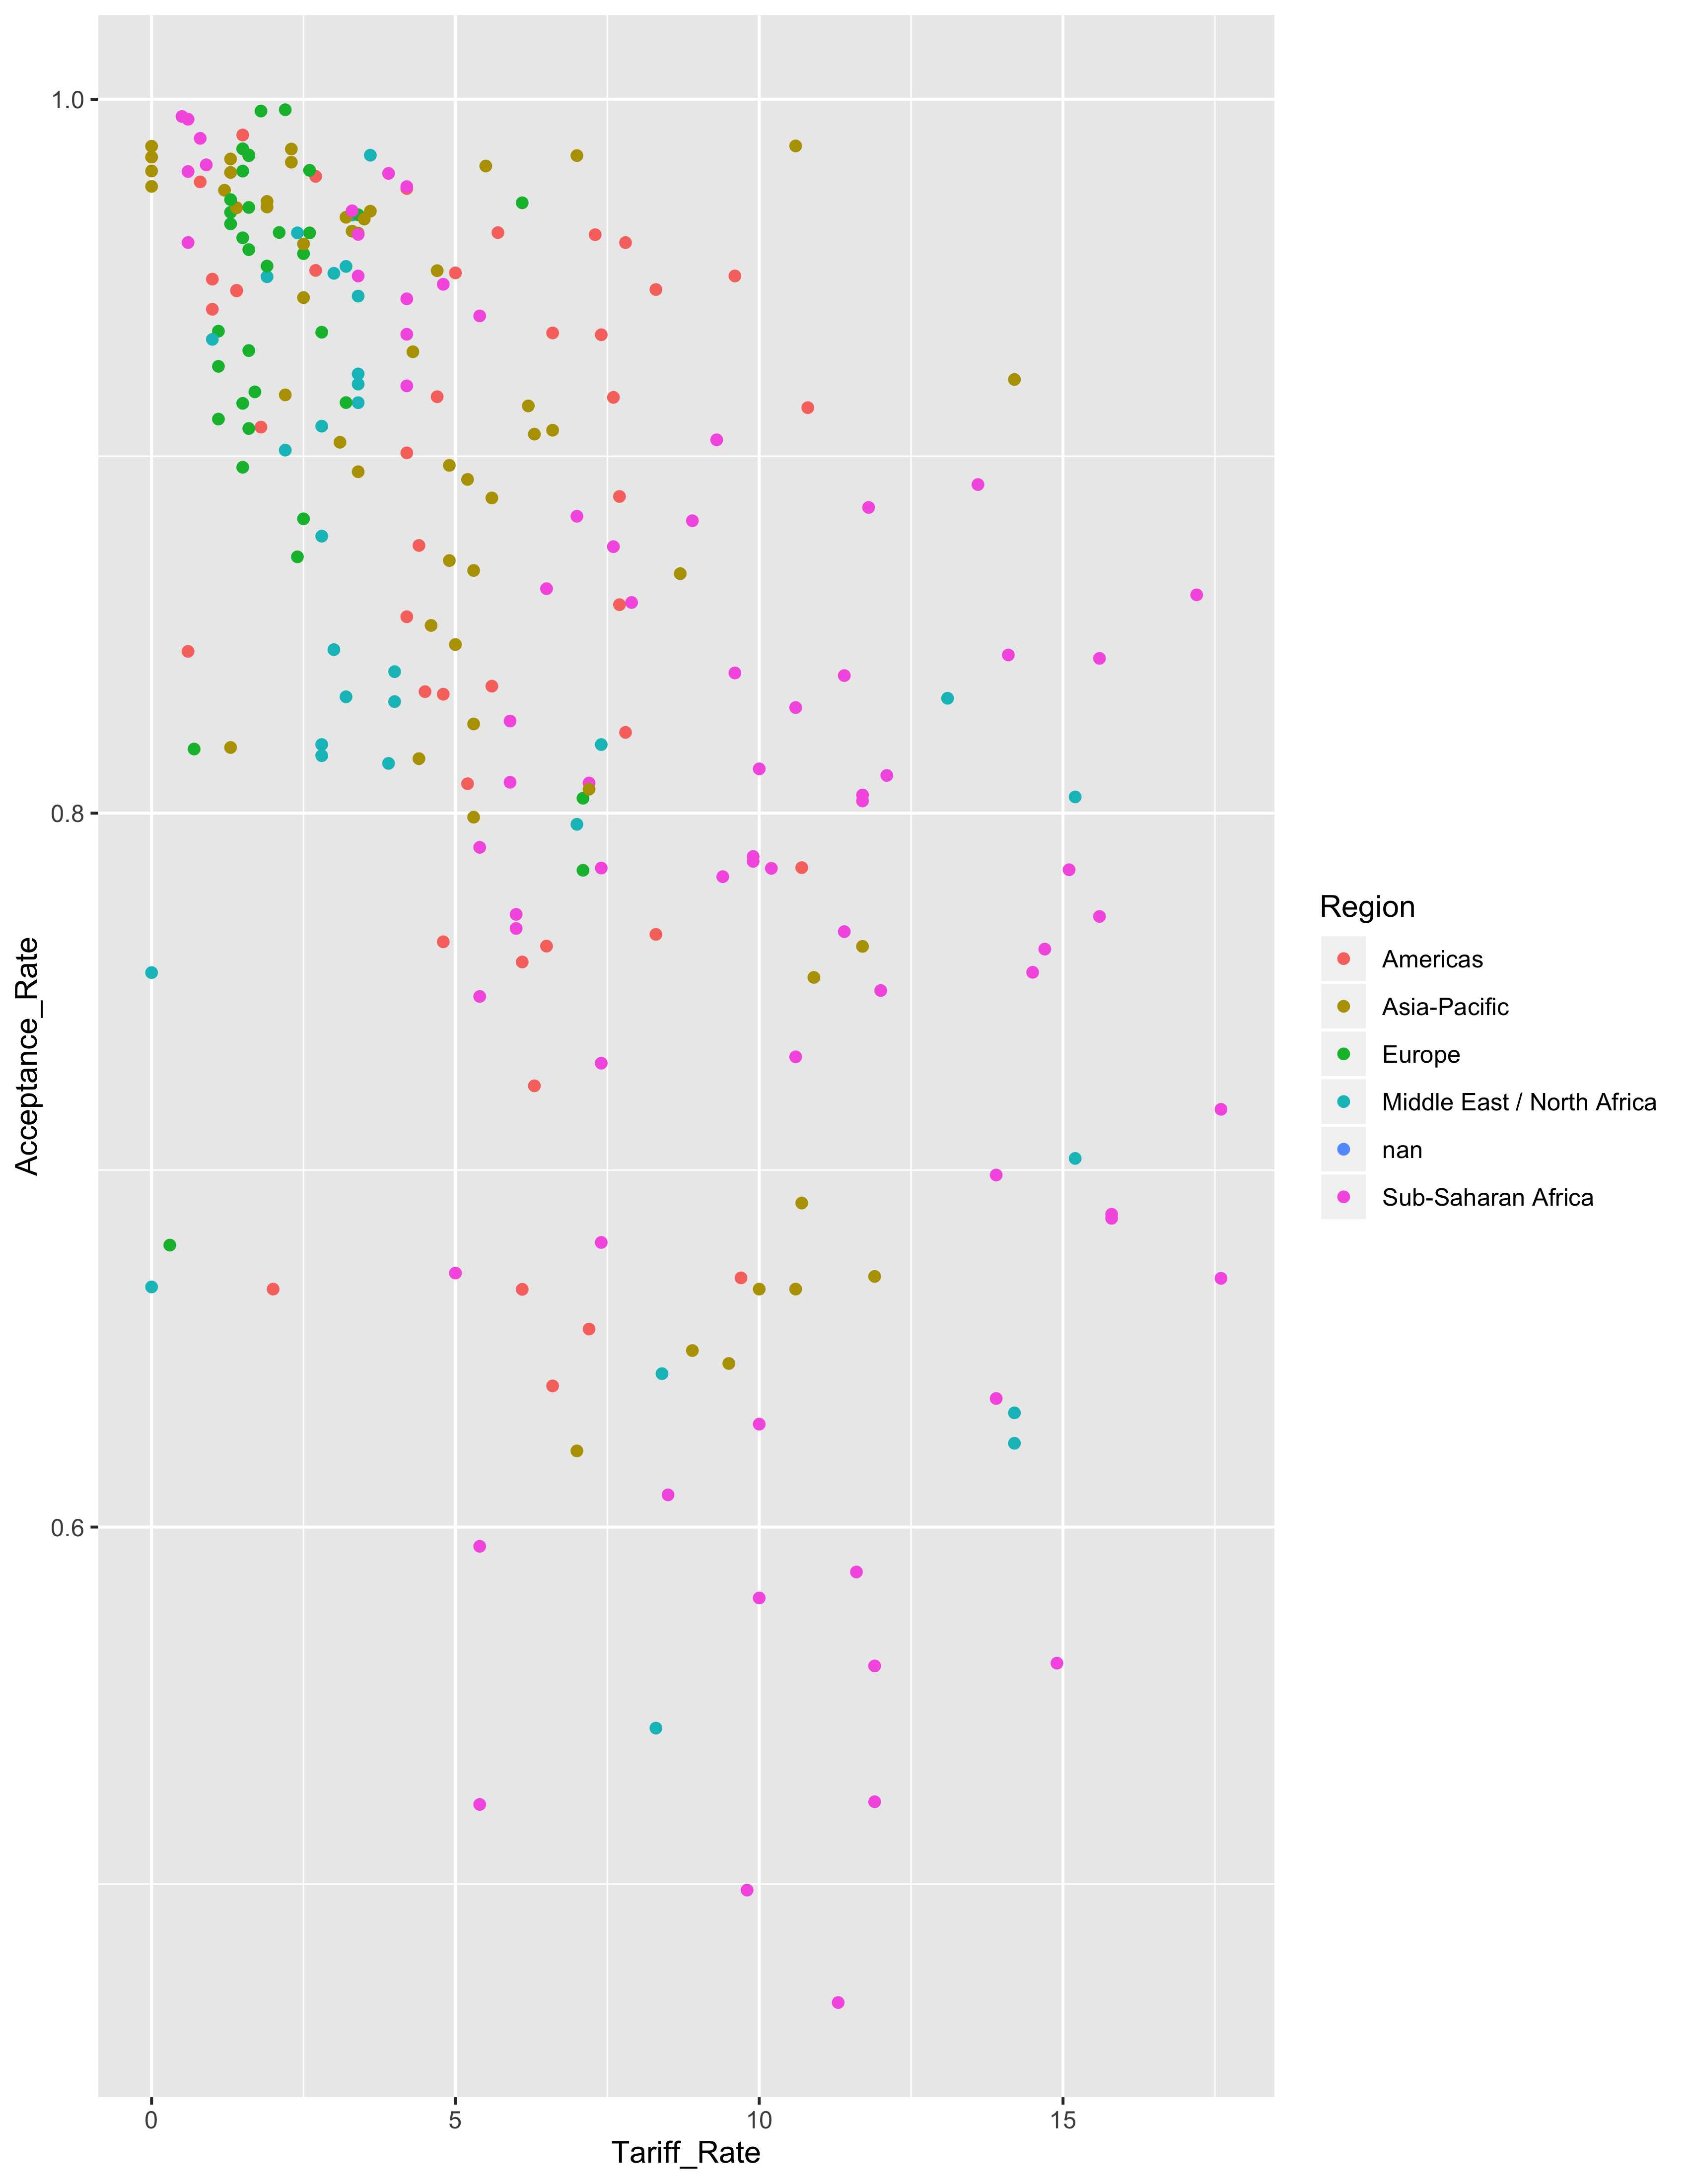

In [260]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + geom_point(aes(x = Tariff_Rate, y = Acceptance_Rate, color = Region), data = nonschengen)

In [ ]:
%%R 

ggplot() +
geom_bar(aes(x = Country))

In [340]:
locations = pd.read_csv('country_centroids_peri.csv', encoding = 'latin1')
locations.columns

Index(['country', 'latitude', 'longitude', 'name'], dtype='object')

In [341]:
locations['name'] = locations['name'].str.upper()
locations = locations[['name', 'longitude', 'latitude']]
locations = locations.merge(issued, left_on = 'name', right_on = 'Country', how = 'right')
locations = make_str(locations)

In [349]:
locations['Acceptance_Rate'] = locations['Total_Issued'] / locations['Total']

In [350]:
with open('ggmaps.txt', 'r') as file:
    key = file.read().strip()

In [351]:
%R -i key -i locations

In [352]:
import rpy2
rpy2.robjects.r['options'](warn=-1)

warn,[RTYPES.REALSXP]


In [ ]:
%%R
options(warn=-1)
library(ggmap)
library(maps)
library(mapdata)
library("dplyr")

register_google(key = key, write = TRUE)

R[write to console]: Source : https://maps.googleapis.com/maps/api/staticmap?center=54.526,15.2551&zoom=4&size=640x640&scale=2&maptype=roadmap&key=xxx



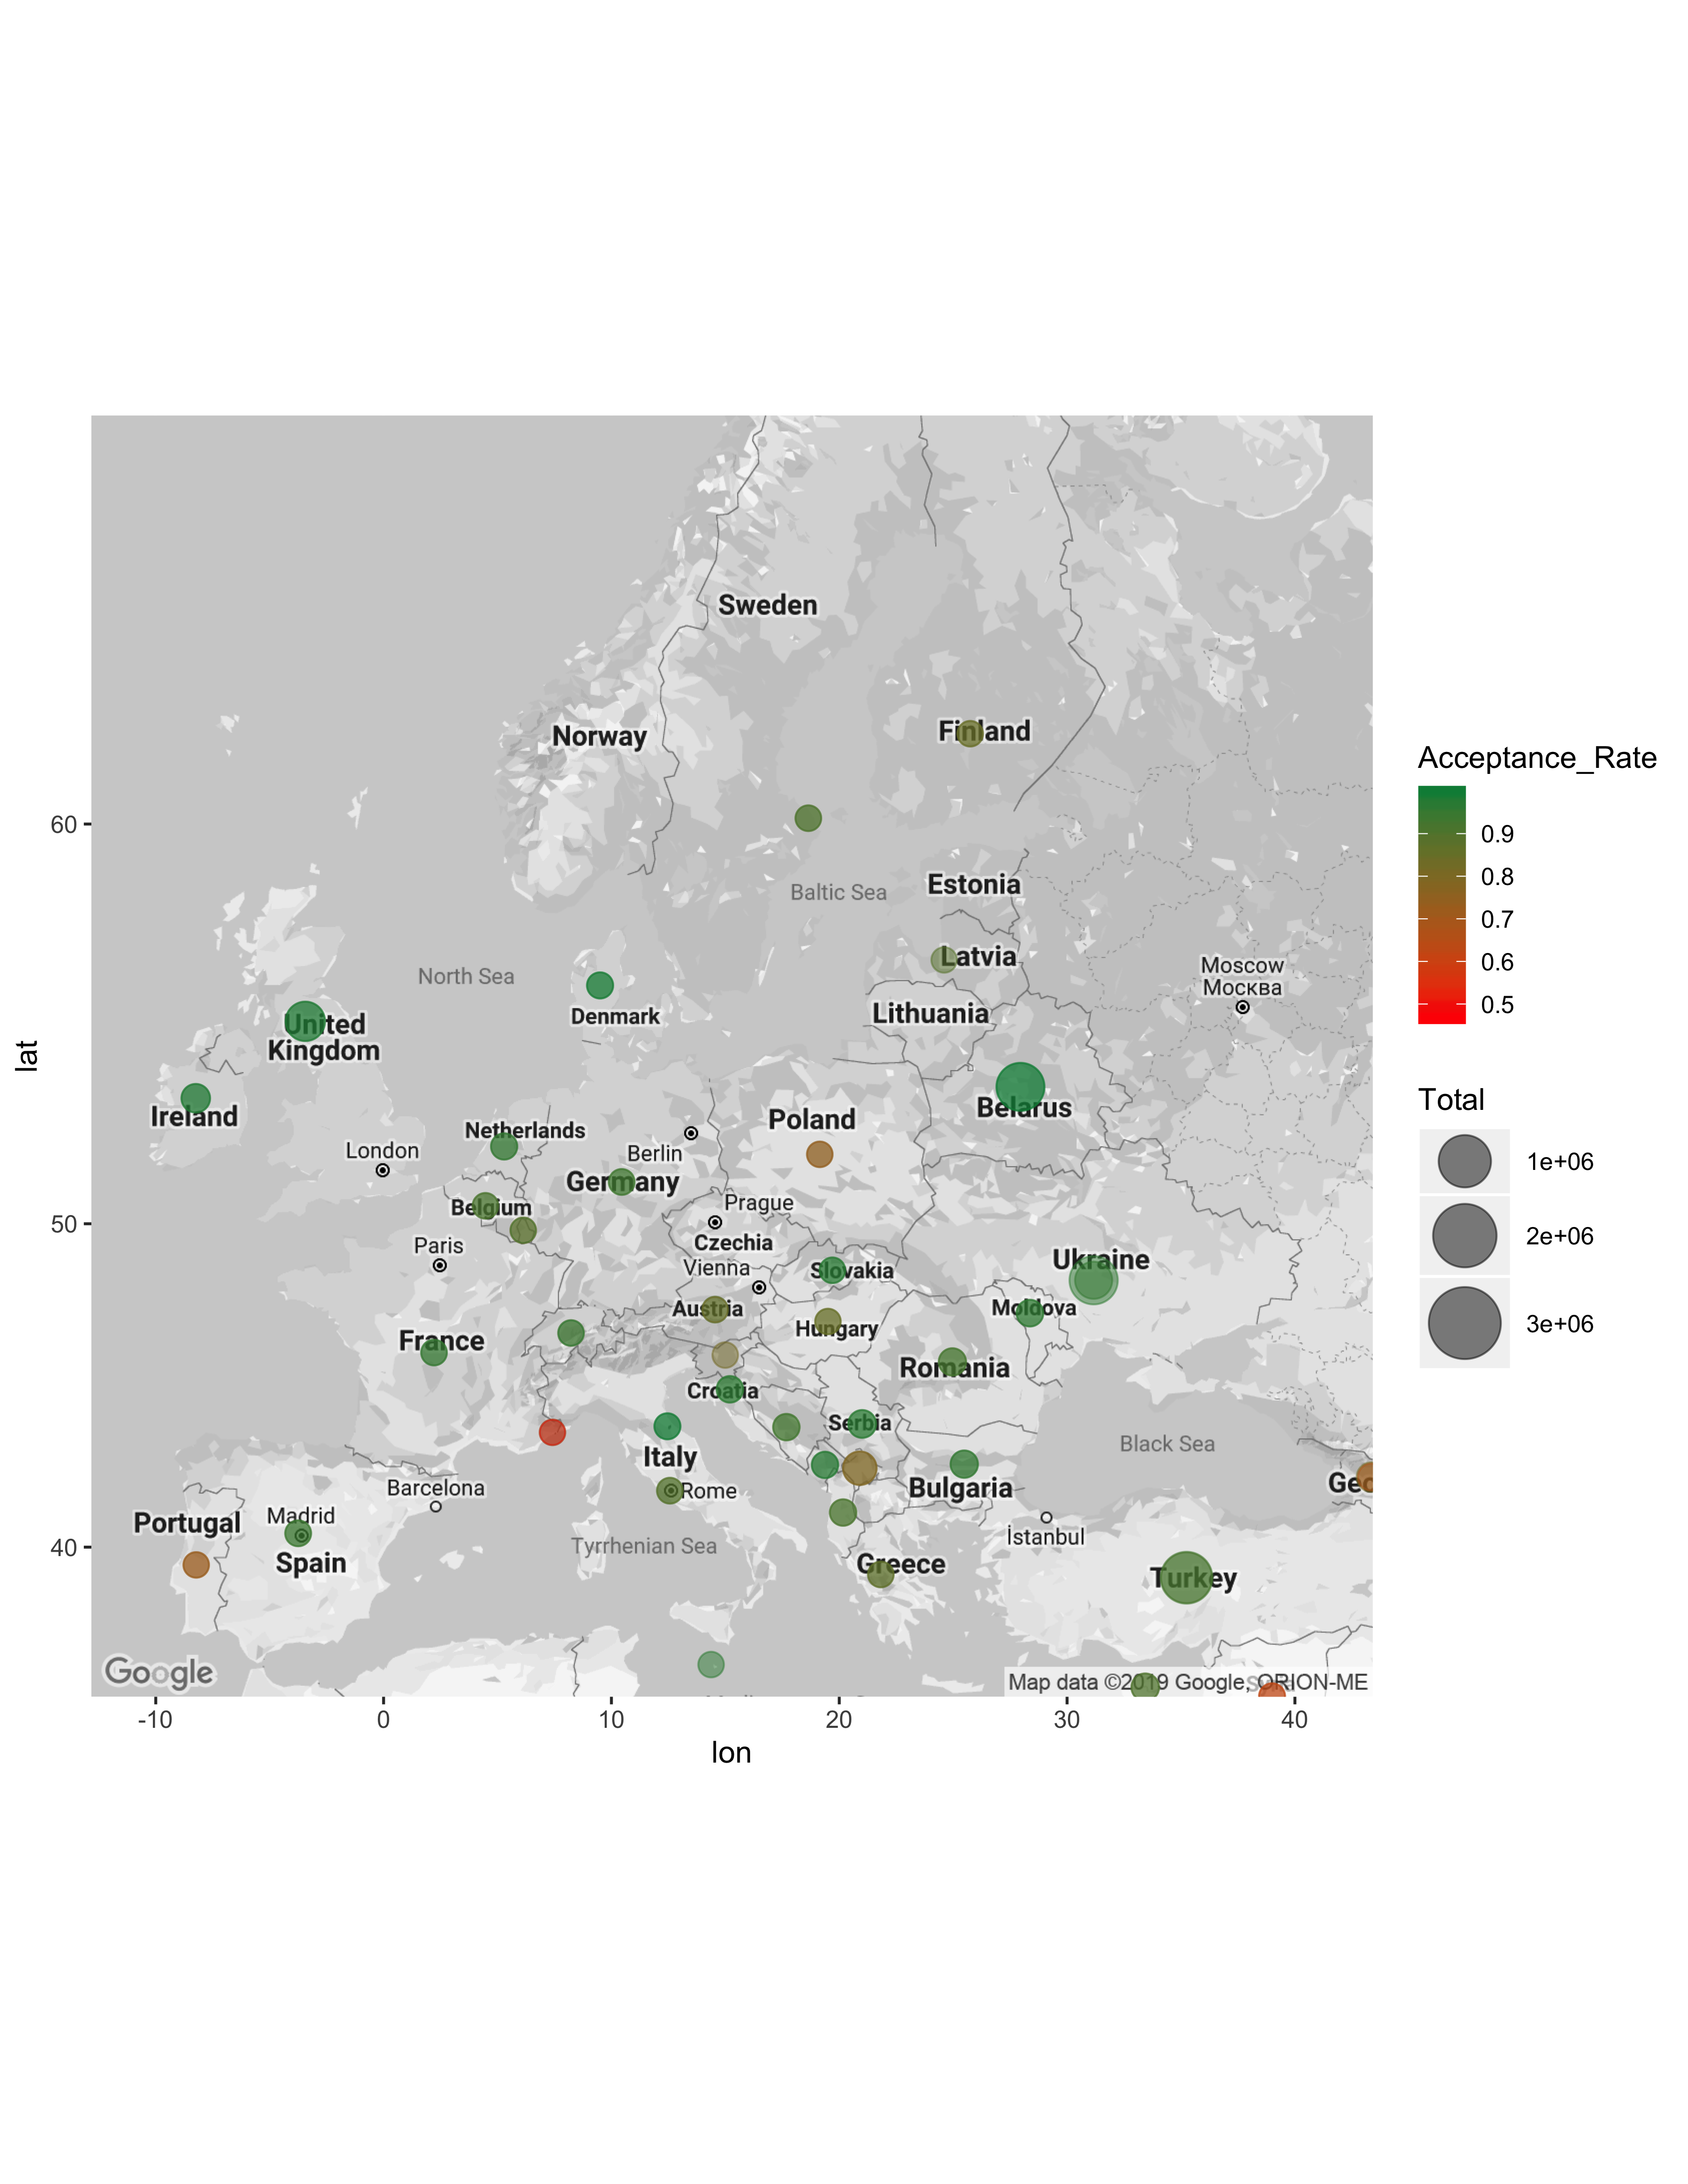

In [354]:
%%R -w 8.5 -h 11 --units in -r 400

ggmap(get_googlemap(center = c(lon = 15.2551, lat = 54.5260), zoom = 4, maptype = 'roadmap', color = 'bw')) +
geom_point(aes(x = longitude, y = latitude, size = Total, color = Acceptance_Rate), alpha = 0.5, data = locations) +
scale_colour_gradient(low = "red", high = "springgreen4") +
scale_size_continuous(range = c(4,13))

# add points on each country with colors from red to green based on lower and higher acceptances, 
# size of dot is volume of applications
